In [1]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import integrate
from scipy import interpolate
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

In [84]:
path = 'C:\\PhD-Zipeng\\Research projects\\Organics\\Samples form Japan\\Indirect data-LF Xu\\No1\\data processing V2-insert points to PT\\PT@E_transposed.csv'
output_path = 'C:\\PhD-Zipeng\\Research projects\\Organics\\Samples form Japan\\Indirect data-LF Xu\\No1\\data processing V2-insert points to PT\\PT@E_transposed_200points.csv'
df = pd.read_csv(path,delimiter='\,')
i=0

PTE = pd.DataFrame()
T = np.linspace(319.12, 331.46, num=200)
PTE.insert(len(PTE.columns), "T", T)


for row in df.iteritems():
    x = df.iloc[:,0]
    y = df.iloc[:,i]
    f = interp1d(x, y,kind='cubic')
    PTE.insert(len(PTE.columns), str(i), f(T))
    i = i+1
    
print(PTE.shape)
PTE.head(5)



C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


(200, 403)


,T,0,1,2,3,4,5,6,7,8,...,392,393,394,395,396,397,398,399,400,401
0,319.12000,319.12000,-0.036300,-0.036200,-0.036200,-0.036100,-0.036100,-0.036000,-0.036000,-0.035900,...,0.036300,0.036300,0.036400,0.036400,0.036400,0.036400,0.036400,0.036400,0.036400,0.036400
1,319.18201,319.18201,-0.036283,-0.036199,-0.036147,-0.036097,-0.036059,-0.035999,-0.035959,-0.035906,...,0.036304,0.036280,0.036357,0.036357,0.036397,0.036357,0.036357,0.036397,0.036397,0.036357
2,319.24402,319.24402,-0.036261,-0.036194,-0.036105,-0.036090,-0.036024,-0.035993,-0.035924,-0.035905,...,0.036301,0.036263,0.036320,0.036321,0.036390,0.036321,0.036321,0.036390,0.036390,0.036321
3,319.30603,319.30603,-0.036237,-0.036184,-0.036072,-0.036080,-0.035993,-0.035983,-0.035893,-0.035897,...,0.036292,0.036248,0.036289,0.036290,0.036380,0.036290,0.036290,0.036380,0.036380,0.036290
4,319.36804,319.36804,-0.036210,-0.036171,-0.036047,-0.036067,-0.035967,-0.035970,-0.035867,-0.035883,...,0.036279,0.036236,0.036263,0.036264,0.036367,0.036264,0.036264,0.036367,0.036367,0.036264


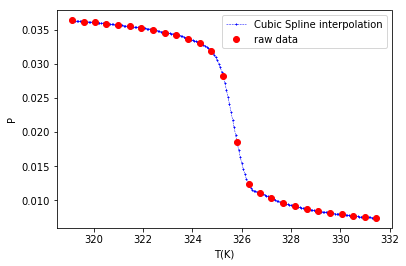

In [90]:
plt.plot(PTE['T'],PTE['401'],'b+--',linewidth=0.5, markersize=2) 
plt.plot(df.iloc[:,0], df.iloc[:,-1],'ro') 
plt.xlabel('T(K)')
plt.ylabel('P')
plt.legend(['Cubic Spline interpolation', 'raw data'], loc='best')
plt.show()

In [91]:
PTE.to_csv(output_path)

In [101]:
PTE_smooth = pd.DataFrame()
T = np.linspace(319.12, 331.46, num=200)
PTE_smooth.insert(len(PTE_smooth.columns), "T", T)
i=0

for row in PTE.iteritems():
    y_smooth = savgol_filter(PTE.iloc[:,i], 41, 2)
    PTE_smooth.insert(len(PTE_smooth.columns), str(i), y_smooth)
    i = i+1
    
PTE_smooth.head(5)

,T,0,1,2,3,4,5,6,7,8,...,393,394,395,396,397,398,399,400,401,402
0,319.12000,319.12000,319.12000,-0.036281,-0.036266,-0.036154,-0.036146,-0.036052,-0.036047,-0.035952,...,0.036306,0.036279,0.036333,0.036352,0.036445,0.036352,0.036352,0.036446,0.036445,0.036354
1,319.18201,319.18201,319.18201,-0.036260,-0.036241,-0.036137,-0.036124,-0.036038,-0.036027,-0.035938,...,0.036293,0.036273,0.036322,0.036337,0.036424,0.036337,0.036337,0.036424,0.036424,0.036338
2,319.24402,319.24402,319.24402,-0.036238,-0.036217,-0.036119,-0.036103,-0.036023,-0.036006,-0.035923,...,0.036279,0.036265,0.036310,0.036321,0.036402,0.036321,0.036321,0.036403,0.036402,0.036321
3,319.30603,319.30603,319.30603,-0.036217,-0.036192,-0.036101,-0.036081,-0.036008,-0.035985,-0.035908,...,0.036265,0.036257,0.036297,0.036304,0.036381,0.036304,0.036304,0.036381,0.036381,0.036305
4,319.36804,319.36804,319.36804,-0.036195,-0.036168,-0.036083,-0.036059,-0.035992,-0.035964,-0.035892,...,0.036250,0.036248,0.036284,0.036287,0.036358,0.036287,0.036287,0.036359,0.036359,0.036288


In [102]:
PTE_smooth.to_csv('C:\\PhD-Zipeng\\Research projects\\Organics\\Samples form Japan\\Indirect data-LF Xu\\No1\\data processing V2-insert points to PT\\PT@E_transposed_200points_smoothed.csv')

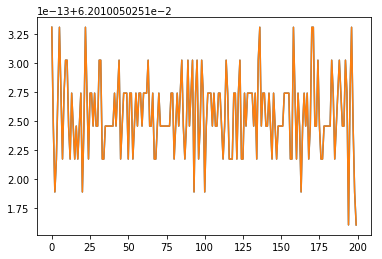

In [105]:
plt.plot(np.gradient(PTE.iloc[:,1]))
plt.show()